<a href="https://colab.research.google.com/github/sudarshanregmi369/PRODIGY_ML_01/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [70]:
df = pd.read_csv('/content/Housing.csv')
# print(df)
# converting the string in
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1,'semi-furnished':0.5, 'unfurnished': 0})
print(df.head)


<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

In [71]:
mean= df.describe()
print(mean)
print(mean.dtypes)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000

25: 3600.0
percentile75: 6360.0
iqr: 2760.0
10638.0
1723.1999999999998


<ipython-input-72-455cff2700be>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
<ipython-input-72-455cff2700be>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['area'])


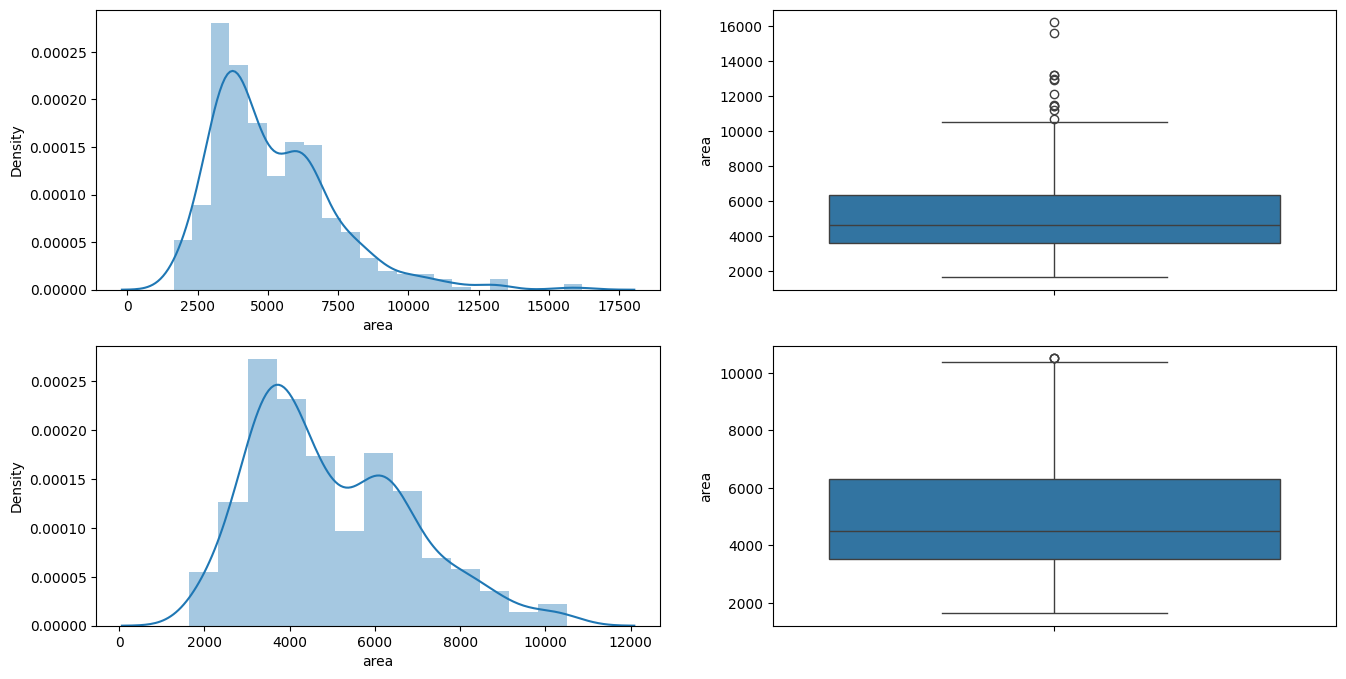

In [72]:
# we are making histogram of all the data in order to compare the data
# histogram = df.hist(bins=10, figsize=(25, 20))
# # plt.show()

#we need to find the outlier in the data for area ,price , and the number of bedroom and the bathoroom
import seaborn as sns
# sns.boxplot(y = df["area"])
percentile25 = df['area'].quantile(0.25)
print("25:",percentile25)
percentile75 = df['area'].quantile(0.75)
print('percentile75:',percentile75)
iqr = percentile75 -percentile25
print("iqr:",iqr)
upper_limit = percentile75 + 1.55 * iqr
print(upper_limit)
lower_limit = percentile25 - 0.68* iqr
print(lower_limit)

##finding the outliers
new_df = df[df['area'] < upper_limit]
new_df.shape

#Comparing the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['area'])
plt.subplot(2,2,2)
sns.boxplot(df['area'])
plt.subplot(2,2,3)
sns.distplot(new_df['area'])
plt.subplot(2,2,4)
sns.boxplot(new_df['area'])
plt.show()





quantile25: 3430000.0
percentile75: 5740000.0
iqr: 2310000.0
9320500.0
1859200.0


<ipython-input-73-29443c9fd200>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
<ipython-input-73-29443c9fd200>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price'])


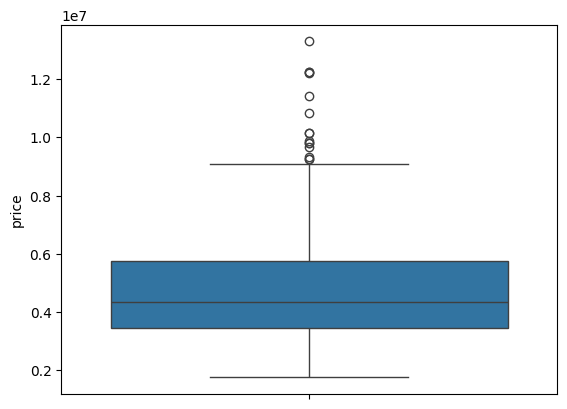

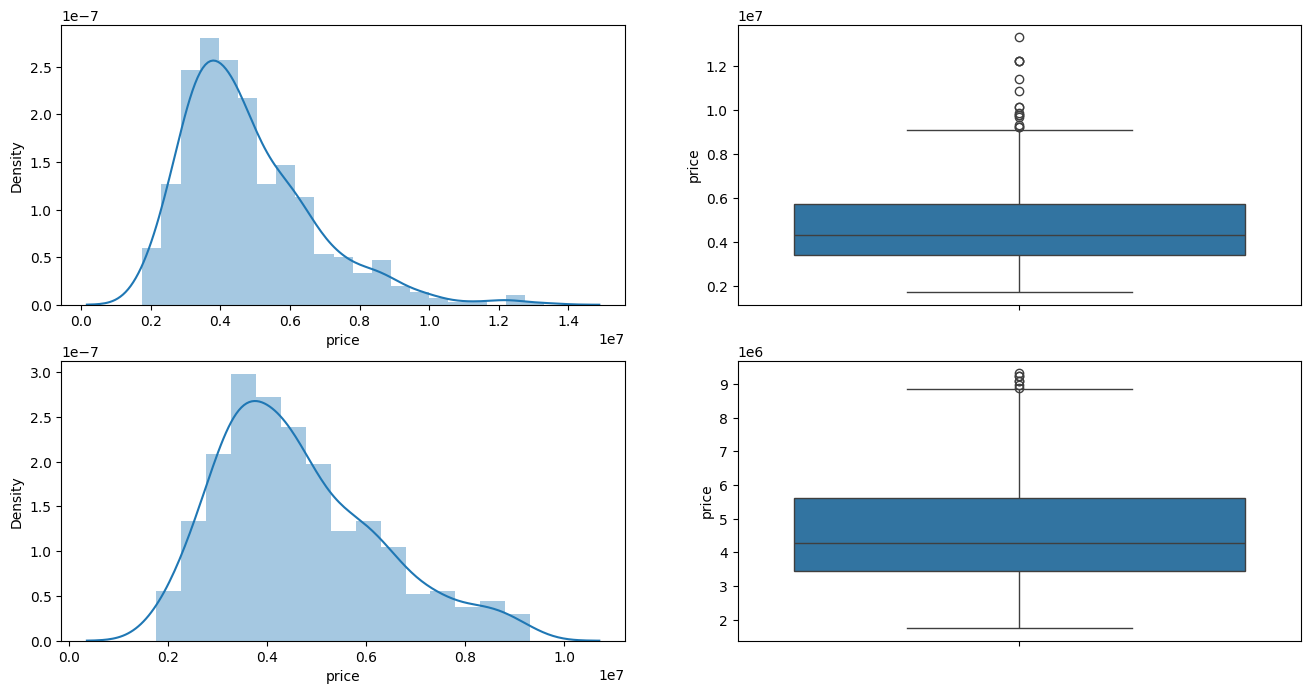

In [73]:
sns.boxplot(y = df["price"])
percentile25 = df['price'].quantile(0.25)
print("quantile25:",percentile25)
percentile75 = df['price'].quantile(0.75)
print('percentile75:',percentile75)
iqr = percentile75 -percentile25
print("iqr:",iqr)
upper_limit = percentile75 + 1.55 * iqr
print(upper_limit)
lower_limit = percentile25 - 0.68* iqr
print(lower_limit)

##finding the outliers
new_df = df[df['price'] < upper_limit]
new_df.shape

#Comparing the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price'])
plt.subplot(2,2,2)
sns.boxplot(df['price'])
plt.subplot(2,2,3)
sns.distplot(new_df['price'])
plt.subplot(2,2,4)
sns.boxplot(new_df['price'])
plt.show()




quantile25: 1.0
percentile75: 2.0
iqr: 1.0
3.55
0.31999999999999995


<ipython-input-74-43a8707a52ba>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathrooms'])
<ipython-input-74-43a8707a52ba>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['bathrooms'])


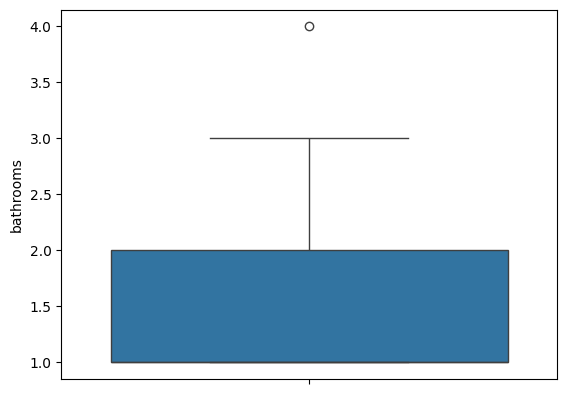

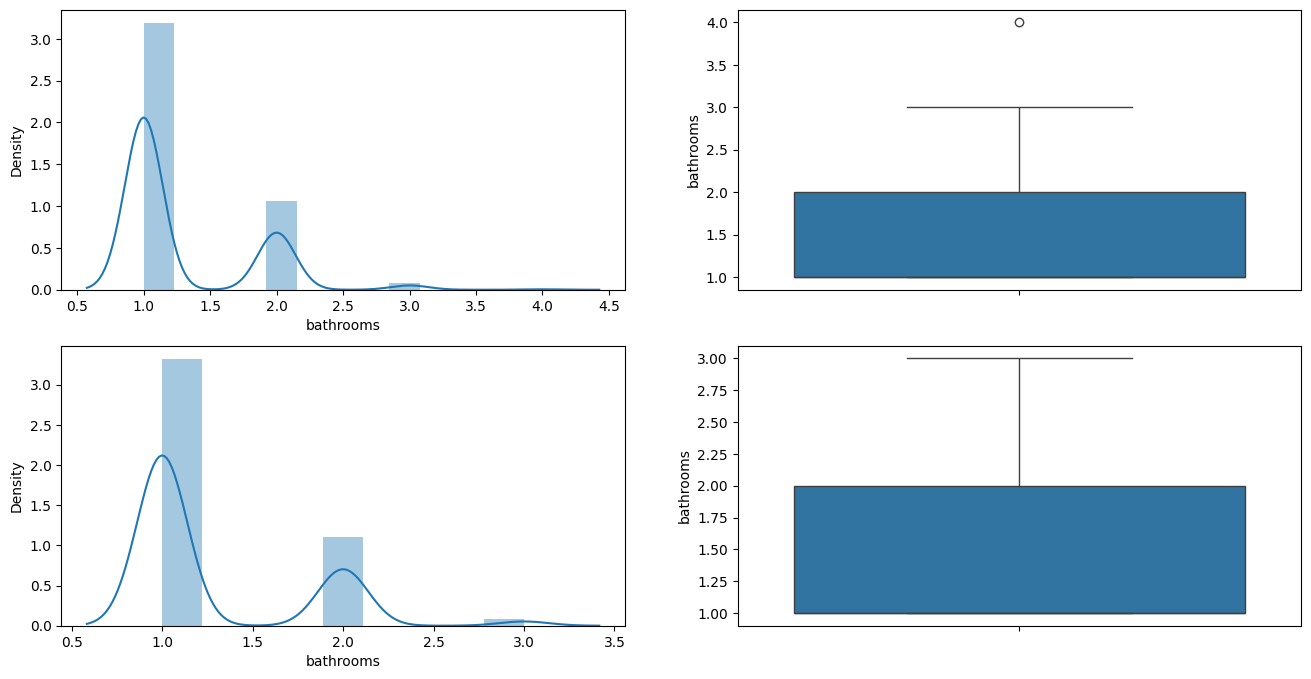

In [74]:
sns.boxplot(y = df["bathrooms"])
percentile25 = df['bathrooms'].quantile(0.25)
print("quantile25:",percentile25)
percentile75 = df['bathrooms'].quantile(0.75)
print('percentile75:',percentile75)
iqr = percentile75 -percentile25
print("iqr:",iqr)
upper_limit = percentile75 + 1.55 * iqr
print(upper_limit)
lower_limit = percentile25 - 0.68* iqr
print(lower_limit)

##finding the outliers
new_df = df[df['bathrooms'] < upper_limit]
new_df.shape

#Comparing the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['bathrooms'])
plt.subplot(2,2,2)
sns.boxplot(df['bathrooms'])
plt.subplot(2,2,3)
sns.distplot(new_df['bathrooms'])
plt.subplot(2,2,4)
sns.boxplot(new_df['bathrooms'])
plt.show()

quantile25: 2.0
percentile75: 3.0
iqr: 1.0
4.55
1.3199999999999998


<ipython-input-75-a95bcfbe88f0>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedrooms'])
<ipython-input-75-a95bcfbe88f0>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['bedrooms'])


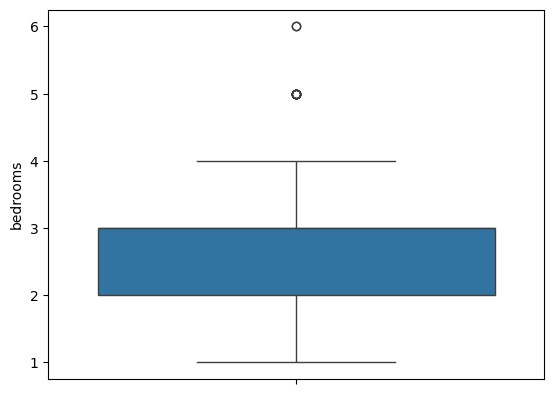

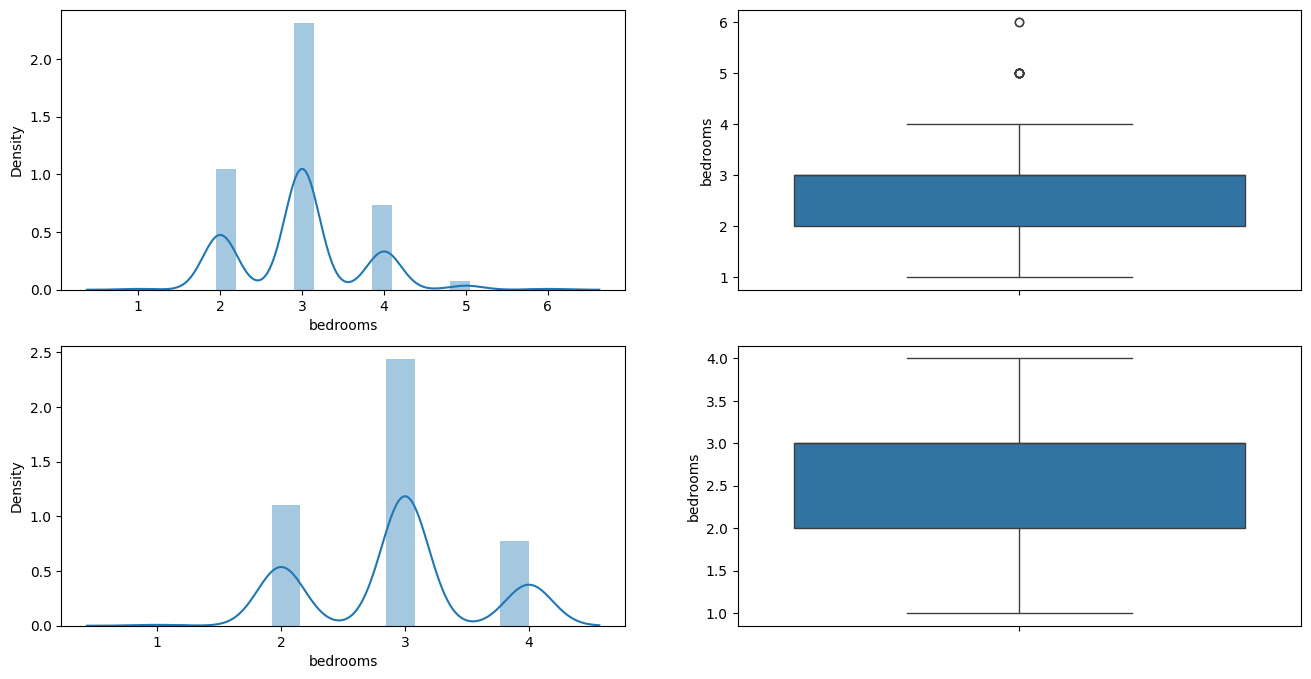

In [75]:
sns.boxplot(y = df["bedrooms"])
percentile25 = df['bedrooms'].quantile(0.25)
print("quantile25:",percentile25)
percentile75 = df['bedrooms'].quantile(0.75)
print('percentile75:',percentile75)
iqr = percentile75 -percentile25
print("iqr:",iqr)
upper_limit = percentile75 + 1.55 * iqr
print(upper_limit)
lower_limit = percentile25 - 0.68* iqr
print(lower_limit)

##finding the outliers
new_df = df[df['bedrooms'] < upper_limit]
new_df.shape

#Comparing the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['bedrooms'])
plt.subplot(2,2,2)
sns.boxplot(df['bedrooms'])
plt.subplot(2,2,3)
sns.distplot(new_df['bedrooms'])
plt.subplot(2,2,4)
sns.boxplot(new_df['bedrooms'])
plt.show()

In [76]:
print(new_df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

<Figure size 1000x800 with 0 Axes>

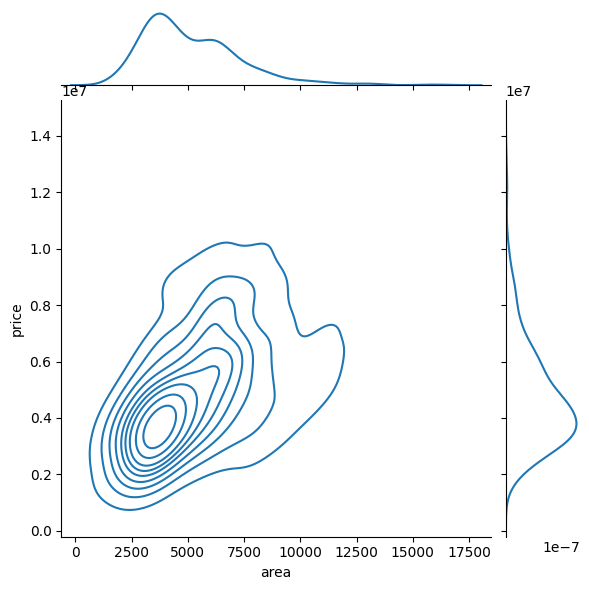

In [77]:
# Visualizing the Correlation between each column and the target variable using jointplot visualization
plt.figure(figsize=(10,8))
sns.jointplot(x=df["area"], y=df["price"],data = new_df, kind ="kde")


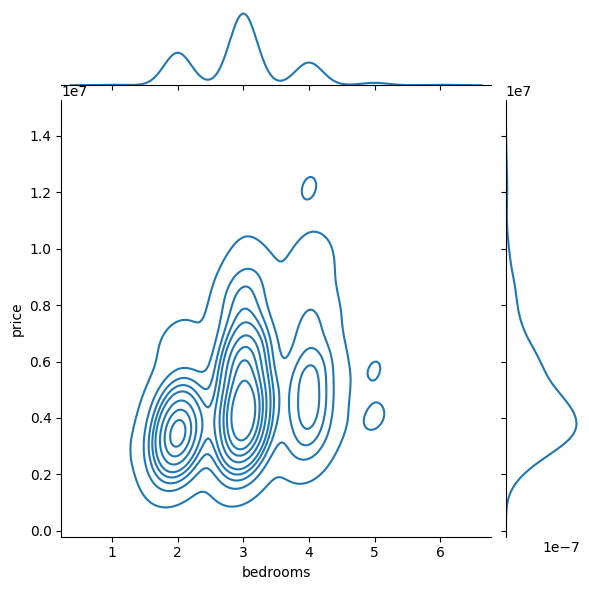

In [78]:
sns.jointplot(x=df["bedrooms"], y=df["price"], kind="kde")

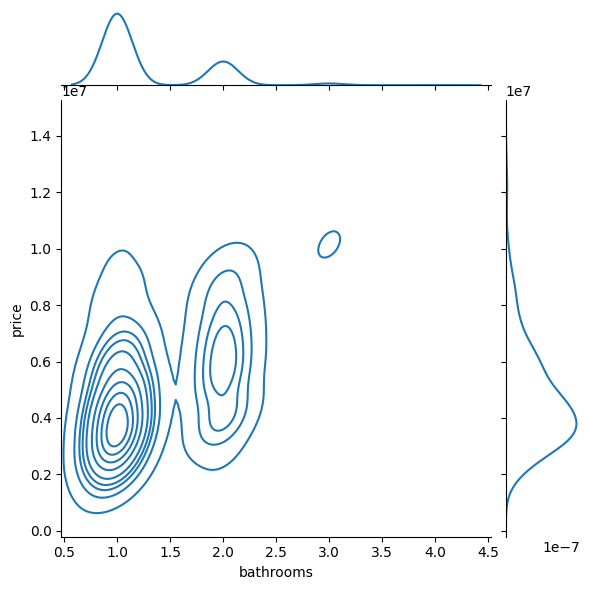

In [79]:
sns.jointplot(x=df["bathrooms"], y=df["price"], kind="kde")

In [81]:
# Split the data into features (X) and target variable (y)
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Build a simple neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error is used as the loss function for regression

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

# Now you can use the trained model to predict house prices for new data
# Take input from the user for new data
new_area = float(input('Enter the area: '))
new_bedrooms = int(input('Enter the number of bedrooms: '))
new_bathrooms = int(input('Enter the number of bathrooms: '))

# Create an array with the user input
new_data = np.array([[new_area, new_bedrooms, new_bathrooms]])
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)
print(f'Predicted Price: {predicted_price[0, 0]}')







Epoch 1/100
436/436 [==============================] - 1s 1ms/step - loss: 25234742706176.0000
Epoch 2/100
436/436 [==============================] - 1s 2ms/step - loss: 25234553962496.0000
Epoch 3/100
436/436 [==============================] - 1s 2ms/step - loss: 25234025480192.0000
Epoch 4/100
436/436 [==============================] - 1s 2ms/step - loss: 25233171939328.0000
Epoch 5/100
436/436 [==============================] - 1s 2ms/step - loss: 25232026894336.0000
Epoch 6/100
436/436 [==============================] - 1s 1ms/step - loss: 25230613413888.0000
Epoch 7/100
436/436 [==============================] - 1s 1ms/step - loss: 25229000704000.0000
Epoch 8/100
436/436 [==============================] - 1s 1ms/step - loss: 25227132141568.0000
Epoch 9/100
436/436 [==============================] - 1s 2ms/step - loss: 25225095806976.0000
Epoch 10/100
436/436 [==============================] - 1s 1ms/step - loss: 25222832979968.0000
Epoch 11/100
436/436 [===========================

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
